In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import array
import datetime
from scipy.stats import linregress
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
from sklearn.metrics import r2_score

In [2]:
#read in data from CSV into DataFrame
bc_inventory_csv="Metro_invt_fs_uc_sfrcondo_sm_month.csv"
bc_inventory_df=pd.read_csv(bc_inventory_csv)


In [3]:
#remove unnecessary columns
bc_clean_inventory=bc_inventory_df.copy()
#drop RegionType, State Name, and contiguous unused Dates
bc_clean_inventory.drop(bc_clean_inventory.iloc[:,3:10], inplace=True, axis=1)
#drop Region ID and latest date
bc_clean_inventory.drop(['RegionID','2023-02-28'], inplace=True, axis=1)
#set index as SizeRank
bc_clean_inventory.set_index("SizeRank", inplace=True)
bc_clean_inventory

,RegionName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
SizeRank,,,,,,,,,,,,,,,,,,,,,
0,United States,1733388.0,1723097.0,1701371.0,1642145.0,1541994.0,1452603.0,1405515.0,1449965.0,1515570.0,...,774472.0,860326.0,946905.0,1033311.0,1092069.0,1101482.0,1085079.0,1032570.0,955889.0,884119.0
1,"New York, NY",91252.0,90050.0,89339.0,87186.0,81944.0,76678.0,74497.0,78192.0,84211.0,...,51340.0,55710.0,58872.0,61312.0,61386.0,60262.0,58241.0,55450.0,50400.0,45916.0
2,"Los Angeles, CA",29874.0,30428.0,30606.0,30035.0,28252.0,26635.0,25849.0,27132.0,28454.0,...,16023.0,17635.0,19187.0,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16766.0
3,"Chicago, IL",49782.0,49630.0,48916.0,46495.0,42304.0,38250.0,36754.0,39387.0,43789.0,...,24246.0,26775.0,28894.0,30846.0,31876.0,31682.0,30798.0,28771.0,25674.0,22770.0
4,"Dallas, TX",33567.0,33512.0,32589.0,31265.0,29283.0,27727.0,27057.0,28543.0,30513.0,...,15053.0,16146.0,17845.0,20485.0,22365.0,22863.0,22445.0,21500.0,19985.0,18560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,"Zapata, TX",62.0,51.0,50.0,50.0,48.0,48.0,47.0,47.0,47.0,...,43.0,42.0,41.0,41.0,44.0,44.0,47.0,46.0,47.0,48.0
924,"Ketchikan, AK",115.0,109.0,105.0,96.0,92.0,85.0,81.0,80.0,81.0,...,63.0,63.0,61.0,59.0,60.0,64.0,63.0,62.0,58.0,56.0
925,"Craig, CO",175.0,169.0,161.0,145.0,129.0,113.0,105.0,104.0,115.0,...,60.0,68.0,72.0,74.0,80.0,84.0,82.0,75.0,66.0,55.0


In [4]:
#restrict data to only top 25 markets
bc_top_25_inventory=bc_clean_inventory.loc[(bc_clean_inventory.index<26),:]
bc_top_25_inventory.head()

,RegionName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
SizeRank,,,,,,,,,,,,,,,,,,,,,
0,United States,1733388.0,1723097.0,1701371.0,1642145.0,1541994.0,1452603.0,1405515.0,1449965.0,1515570.0,...,774472.0,860326.0,946905.0,1033311.0,1092069.0,1101482.0,1085079.0,1032570.0,955889.0,884119.0
1,"New York, NY",91252.0,90050.0,89339.0,87186.0,81944.0,76678.0,74497.0,78192.0,84211.0,...,51340.0,55710.0,58872.0,61312.0,61386.0,60262.0,58241.0,55450.0,50400.0,45916.0
2,"Los Angeles, CA",29874.0,30428.0,30606.0,30035.0,28252.0,26635.0,25849.0,27132.0,28454.0,...,16023.0,17635.0,19187.0,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16766.0
3,"Chicago, IL",49782.0,49630.0,48916.0,46495.0,42304.0,38250.0,36754.0,39387.0,43789.0,...,24246.0,26775.0,28894.0,30846.0,31876.0,31682.0,30798.0,28771.0,25674.0,22770.0
4,"Dallas, TX",33567.0,33512.0,32589.0,31265.0,29283.0,27727.0,27057.0,28543.0,30513.0,...,15053.0,16146.0,17845.0,20485.0,22365.0,22863.0,22445.0,21500.0,19985.0,18560.0


In [5]:
#export final dataframe for use
bc_top_25_inventory.to_csv(f"Top 25 For Sale Inventory.csv")

# Top 25 Markets Visualization concept

In [6]:
#prepare y-values
top_25_region_df=bc_top_25_inventory.set_index("RegionName")
y_raw=top_25_region_df.copy()
y_raw.drop(index="United States", inplace=True)
y_raw

,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
RegionName,,,,,,,,,,,,,,,,,,,,,
"New York, NY",91252.0,90050.0,89339.0,87186.0,81944.0,76678.0,74497.0,78192.0,84211.0,91255.0,...,51340.0,55710.0,58872.0,61312.0,61386.0,60262.0,58241.0,55450.0,50400.0,45916.0
"Los Angeles, CA",29874.0,30428.0,30606.0,30035.0,28252.0,26635.0,25849.0,27132.0,28454.0,30124.0,...,16023.0,17635.0,19187.0,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16766.0
"Chicago, IL",49782.0,49630.0,48916.0,46495.0,42304.0,38250.0,36754.0,39387.0,43789.0,48113.0,...,24246.0,26775.0,28894.0,30846.0,31876.0,31682.0,30798.0,28771.0,25674.0,22770.0
"Dallas, TX",33567.0,33512.0,32589.0,31265.0,29283.0,27727.0,27057.0,28543.0,30513.0,32932.0,...,15053.0,16146.0,17845.0,20485.0,22365.0,22863.0,22445.0,21500.0,19985.0,18560.0
"Houston, TX",32911.0,32423.0,31475.0,30059.0,28517.0,27451.0,27492.0,29072.0,30727.0,32388.0,...,17175.0,18420.0,19852.0,21624.0,23069.0,23666.0,23545.0,22815.0,21748.0,20780.0
"Washington, DC",23728.0,23421.0,23196.0,22306.0,20022.0,17421.0,15899.0,16978.0,19236.0,21772.0,...,12831.0,14873.0,16216.0,16871.0,16758.0,16432.0,15801.0,14799.0,12889.0,11090.0
"Miami, FL",50432.0,49919.0,50254.0,50709.0,51011.0,52285.0,54550.0,57816.0,59250.0,59411.0,...,25059.0,25474.0,26465.0,28557.0,30756.0,31767.0,32323.0,32290.0,32528.0,33272.0
"Philadelphia, PA",28691.0,27833.0,27618.0,26984.0,25501.0,23875.0,22874.0,23683.0,25202.0,26821.0,...,13406.0,14796.0,15876.0,16533.0,16721.0,16359.0,16002.0,15231.0,13911.0,12593.0
"Atlanta, GA",31488.0,31341.0,30823.0,29671.0,28111.0,26971.0,27807.0,29434.0,31132.0,32199.0,...,17556.0,18917.0,20445.0,22314.0,23890.0,24413.0,24318.0,23280.0,21753.0,20172.0


In [7]:
#Transpose for easy pandas plotting
y_val=y_raw.transpose()


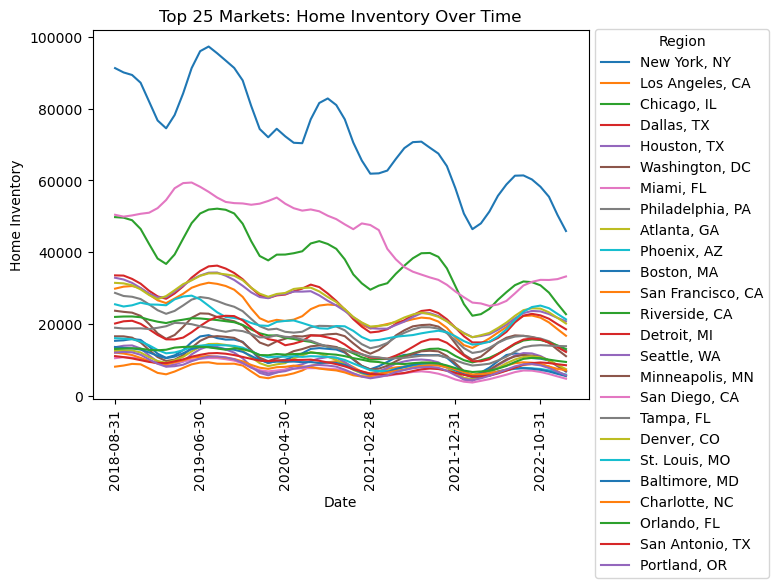

In [8]:
top_25_inventory_plot=y_val.plot(rot=90, 
                                 xlabel='Date',
                                 ylabel="Home Inventory",
                                 title="Top 25 Markets: Home Inventory Over Time")
top_25_inventory_plot.legend(title='Region',bbox_to_anchor=(1,1.02), loc="upper left")
top_25_inventory_plot.get_figure().savefig('top25inv.png', bbox_inches="tight", dpi=300)


# 30-yr Mortgage Rate vs. Inventory

In [9]:
#import mortgage rate
mort_csv="M30_horizontal.csv"
mort_df=pd.read_csv(mort_csv)
#clean imported information
mort_df.set_index("Unnamed: 0",inplace=True)
mort_df.index.name=None
mort_df

,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,...,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01
30-Yr Mortgage Rate,4.63,4.83,4.87,4.64,4.46,4.37,4.27,4.14,4.07,3.8,...,5.23,5.52,5.41,5.22,6.11,6.9,6.81,6.36,6.27,6.26


The r-value is:0.007782614697515186


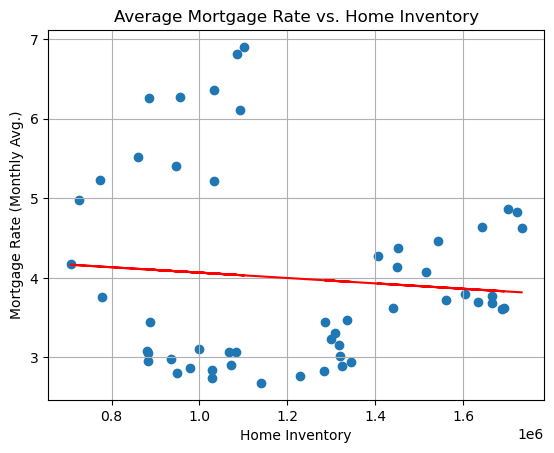

In [10]:
#convert data to float
x_raw=top_25_region_df.loc['United States']
x_val=x_raw.astype(float)
y_raw=mort_df.loc["30-Yr Mortgage Rate"]
y_val=y_raw.astype(float)
#plot data
plt.scatter(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
inv_m30_regress=x_val*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val,inv_m30_regress,"r-")
plt.annotate(line_eq,(5,3),fontsize=15,color="red")
plt.xlabel("Home Inventory")
plt.ylabel("Mortgage Rate (Monthly Avg.)")
plt.grid()
plt.title("Average Mortgage Rate vs. Home Inventory")
print(f'The r-value is:{rvalue*rvalue}')
plt.savefig("30yrvinv.png")

The r-squared value is: -16.334739213258604


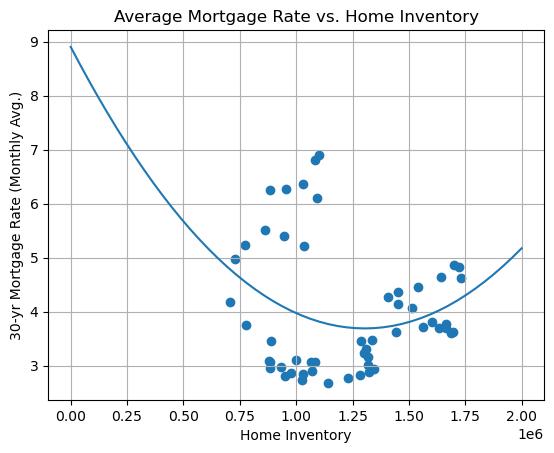

In [11]:
#try polynomial regression
#create plot
poly_inv_mort=np.poly1d(np.polyfit(x_val, y_val, 2))

#create regression line
myline = np.linspace(0, 2000000)

#Scatter plot
plt.scatter(x_val, y_val)
plt.plot(myline, poly_inv_mort(myline))
plt.xlabel("Home Inventory")
plt.ylabel("Mortgage Rate (Monthly Avg.)")
plt.grid()
plt.title("Average Mortgage Rate vs. Home Inventory")
#Calculate r-squared value
print(f"The r-squared value is: {r2_score(x_val, poly_inv_mort(x_val))}")


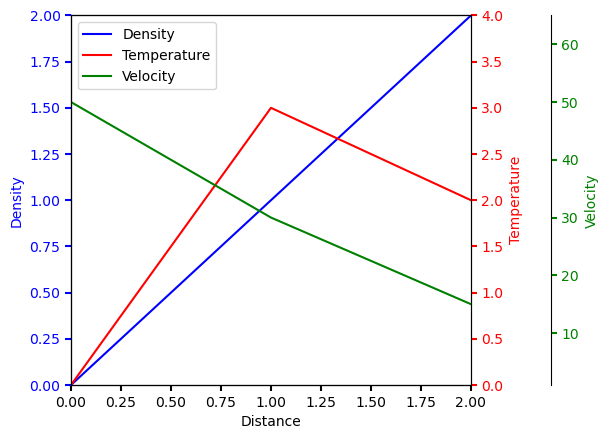

In [12]:
#Example of multi-axis plot for reference
#from: https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
p2, = twin1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
p3, = twin2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
twin1.set_ylim(0, 4)
twin2.set_ylim(1, 65)

ax.set_xlabel("Distance")
ax.set_ylabel("Density")
twin1.set_ylabel("Temperature")
twin2.set_ylabel("Velocity")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2, p3])

plt.show()

In [13]:
#prepare column names for plotting
#convert column names to series
x_raw=pd.Series(top_25_region_df.columns)
#convert strings to datetime type
x_val=pd.to_datetime(x_raw)

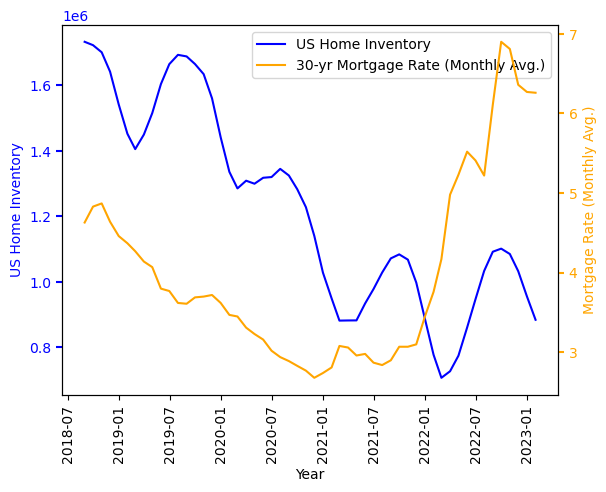

In [15]:
# plot Average US List Price and Average US Mortgage Rate multi-line Plot
# set x and y values
us_home_inventory = top_25_region_df.loc['United States']
us_home_inventory=us_home_inventory.astype(float)
us_average_mortgage=mort_df.loc["30-Yr Mortgage Rate"]
us_average_mortgage=us_average_mortgage.astype(float)
# plot figure using ax subplots for multi-y-axis
fig, ax = plt.subplots()
twin1 = ax.twinx()
inventory_plot, = ax.plot(x_val, us_home_inventory, color="blue", label="US Home Inventory" )
mortgage_plot, = twin1.plot(x_val, us_average_mortgage, color='orange', label="30-yr Mortgage Rate (Monthly Avg.)")
# set tick lables, colors, and rotation
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=inventory_plot.get_color(), **tkw)
twin1.tick_params(axis='y', colors=mortgage_plot.get_color(), **tkw)
ax.yaxis.label.set_color(inventory_plot.get_color())
twin1.yaxis.label.set_color(mortgage_plot.get_color())
#set labels
ax.set_xlabel('Year')
ax.set_ylabel('US Home Inventory')
twin1.set_ylabel('Mortgage Rate (Monthly Avg.)')
# set legend
ax.legend(handles = [inventory_plot, mortgage_plot])
# Save the figure
plt.savefig("invmort.png")
# show plot
plt.show()

In [16]:
#read in the prime rate and convert to pandas DataFrame
#import mortgage rate
prime_csv="prime_vertical.csv"
prime_df=pd.read_csv(prime_csv)
#clean imported information
prime_df.set_index("Dates",inplace=True)
prime_df

,Prime Rate
Dates,
2018-09-01,5.03
2018-10-01,5.25
2018-11-01,5.25
2018-12-01,5.35
2019-01-01,5.50
2019-02-01,5.50
2019-03-01,5.50
2019-04-01,5.50
2019-05-01,5.50


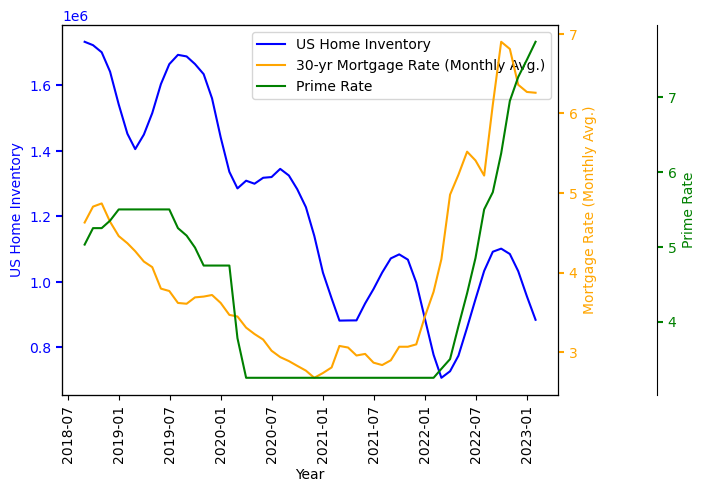

In [18]:
# plot Average US List Price and Average US Mortgage Rate multi-line Plot
# set x and y values
us_home_inventory = top_25_region_df.loc['United States']
us_home_inventory=us_home_inventory.astype(float)
us_average_mortgage=mort_df.loc["30-Yr Mortgage Rate"]
us_average_mortgage=us_average_mortgage.astype(float)
us_prime_rate=prime_df["Prime Rate"]
us_prime_rate=us_prime_rate.astype(float)
# plot figure using ax subplots for multi-y-axis
fig, ax = plt.subplots()
twin1 = ax.twinx()
twin2 = ax.twinx()
inventory_plot, = ax.plot(x_val, us_home_inventory, color="blue", label="US Home Inventory" )
mortgage_plot, = twin1.plot(x_val, us_average_mortgage, color='orange', label="30-yr Mortgage Rate (Monthly Avg.)")
prime_plot, = twin2.plot(x_val, us_prime_rate, color='green', label="Prime Rate")
# set tick lables, colors, and rotation
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=inventory_plot.get_color(), **tkw)
twin1.tick_params(axis='y', colors=mortgage_plot.get_color(), **tkw)
twin2.tick_params(axis='y', colors=prime_plot.get_color(), **tkw)
ax.yaxis.label.set_color(inventory_plot.get_color())
twin1.yaxis.label.set_color(mortgage_plot.get_color())
twin2.yaxis.label.set_color(prime_plot.get_color())
#set labels
ax.set_xlabel('Year')
ax.set_ylabel('US Home Inventory')
twin1.set_ylabel('Mortgage Rate (Monthly Avg.)')
twin2.set_ylabel('Prime Rate')
# set legend
ax.legend(handles = [inventory_plot, mortgage_plot, prime_plot])
#offset the spine of twin 2
twin2.spines.right.set_position(("axes", 1.2))
# Save the figure
plt.savefig("invmortprime.png", bbox_inches="tight", dpi=300)
# show plot
plt.show()

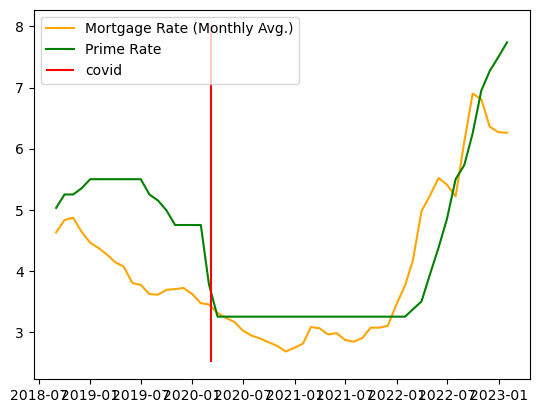

In [19]:
#Proof of concept for historic vlines
plt.plot(x_val, us_average_mortgage, color='orange', label="Mortgage Rate (Monthly Avg.)")
plt.plot(x_val, us_prime_rate, color='green', label="Prime Rate")
plt.vlines(datetime.date(2020, 3, 9), ymin=2.5, ymax=8, colors='red',label="covid")
plt.legend()


In [39]:
#clean y-values
top_25_region_df=bc_top_25_inventory.set_index("RegionName")
top_markets=top_25_region_df.copy()
top_markets.drop(index="United States", inplace=True)
top_markets.columns=x_val
top_markets

,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
RegionName,,,,,,,,,,,,,,,,,,,,,
"New York, NY",91252.0,90050.0,89339.0,87186.0,81944.0,76678.0,74497.0,78192.0,84211.0,91255.0,...,51340.0,55710.0,58872.0,61312.0,61386.0,60262.0,58241.0,55450.0,50400.0,45916.0
"Los Angeles, CA",29874.0,30428.0,30606.0,30035.0,28252.0,26635.0,25849.0,27132.0,28454.0,30124.0,...,16023.0,17635.0,19187.0,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16766.0
"Chicago, IL",49782.0,49630.0,48916.0,46495.0,42304.0,38250.0,36754.0,39387.0,43789.0,48113.0,...,24246.0,26775.0,28894.0,30846.0,31876.0,31682.0,30798.0,28771.0,25674.0,22770.0
"Dallas, TX",33567.0,33512.0,32589.0,31265.0,29283.0,27727.0,27057.0,28543.0,30513.0,32932.0,...,15053.0,16146.0,17845.0,20485.0,22365.0,22863.0,22445.0,21500.0,19985.0,18560.0
"Houston, TX",32911.0,32423.0,31475.0,30059.0,28517.0,27451.0,27492.0,29072.0,30727.0,32388.0,...,17175.0,18420.0,19852.0,21624.0,23069.0,23666.0,23545.0,22815.0,21748.0,20780.0
"Washington, DC",23728.0,23421.0,23196.0,22306.0,20022.0,17421.0,15899.0,16978.0,19236.0,21772.0,...,12831.0,14873.0,16216.0,16871.0,16758.0,16432.0,15801.0,14799.0,12889.0,11090.0
"Miami, FL",50432.0,49919.0,50254.0,50709.0,51011.0,52285.0,54550.0,57816.0,59250.0,59411.0,...,25059.0,25474.0,26465.0,28557.0,30756.0,31767.0,32323.0,32290.0,32528.0,33272.0
"Philadelphia, PA",28691.0,27833.0,27618.0,26984.0,25501.0,23875.0,22874.0,23683.0,25202.0,26821.0,...,13406.0,14796.0,15876.0,16533.0,16721.0,16359.0,16002.0,15231.0,13911.0,12593.0
"Atlanta, GA",31488.0,31341.0,30823.0,29671.0,28111.0,26971.0,27807.0,29434.0,31132.0,32199.0,...,17556.0,18917.0,20445.0,22314.0,23890.0,24413.0,24318.0,23280.0,21753.0,20172.0


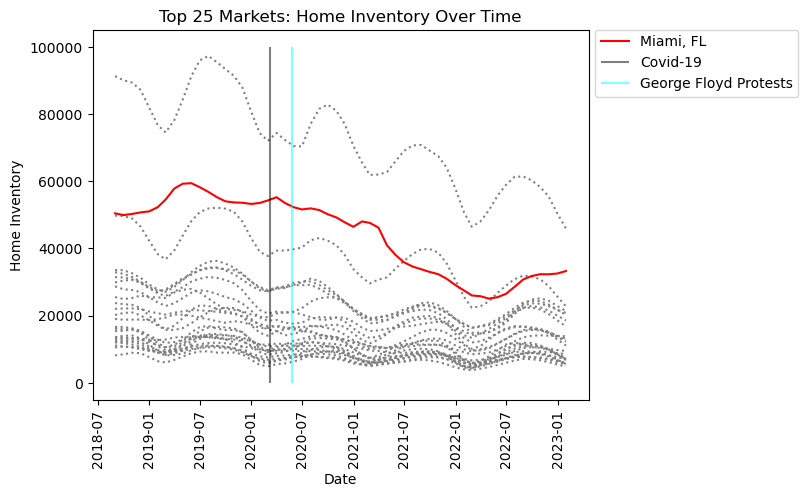

In [57]:
#isolate Miami, FL Market
for index, row in top_markets.iterrows():
    market_y=top_markets.loc[index].astype(float)
    if index == "Miami, FL":
        plt.plot(x_val, market_y, color="red", label=index),
    else:
        plt.plot(x_val, market_y, color="grey", linestyle="dotted")
plt.xlabel("Date")
plt.ylabel("Home Inventory")
plt.xticks(rotation = 90)
plt.title("Top 25 Markets: Home Inventory Over Time")
plt.vlines(datetime.date(2020, 3, 9), ymin=1, ymax=100000, alpha=.5, colors='black',label="Covid-19")
plt.vlines(datetime.date(2020, 5, 26), ymin=2.5, ymax=100000, alpha=.5, colors='cyan',label="George Floyd Protests")
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left")

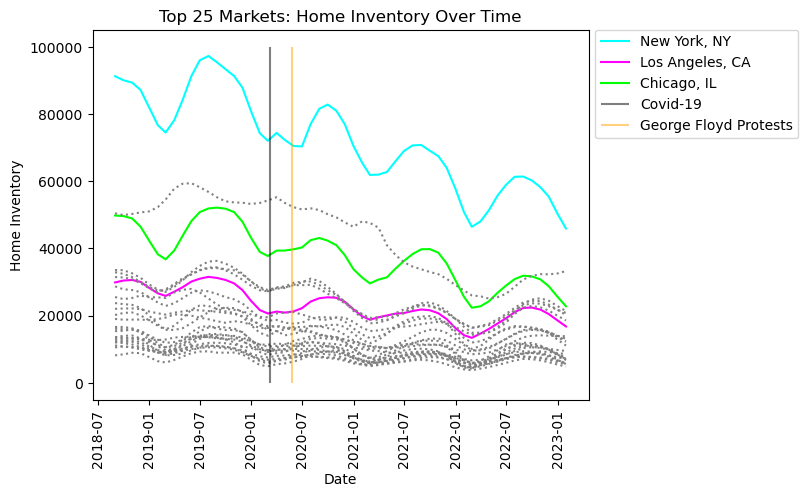

In [55]:
#isolate Miami, FL Market
for index, row in top_markets.iterrows():
    market_y=top_markets.loc[index].astype(float)
    if index == "New York, NY":
        plt.plot(x_val, market_y, color="cyan", label=index),
    elif index == "Chicago, IL":
        plt.plot(x_val, market_y, color="lime", label=index)
    elif index == "Los Angeles, CA":
        plt.plot(x_val, market_y, color="magenta", label=index)
    else:
        plt.plot(x_val, market_y, color="grey", linestyle="dotted")
plt.xlabel("Date")
plt.ylabel("Home Inventory")
plt.xticks(rotation = 90)
plt.title("Top 25 Markets: Home Inventory Over Time")
plt.vlines(datetime.date(2020, 3, 9), ymin=1, ymax=100000, alpha=.5, colors='black',label="Covid-19")
plt.vlines(datetime.date(2020, 5, 26), ymin=2.5, ymax=100000, alpha=.5, colors='orange',label="George Floyd Protests")
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left")